# Inference code for face detection algorthims

Download test image

In [1]:
!wget -O test-image.jpg "https://www.dropbox.com/s/cmf4bgwl559l4s2/face-detection-test-image.jpg?dl=1"

--2022-12-26 11:44:17--  https://www.dropbox.com/s/cmf4bgwl559l4s2/face-detection-test-image.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6031:18::a27d:5112, 162.125.81.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6031:18::a27d:5112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/cmf4bgwl559l4s2/face-detection-test-image.jpg [following]
--2022-12-26 11:44:17--  https://www.dropbox.com/s/dl/cmf4bgwl559l4s2/face-detection-test-image.jpg
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uced09efb4b0c2509eda6e8a7231.dl.dropboxusercontent.com/cd/0/get/BzXGzcBh0jIkn3bVraHi4aoidvmiLgc_aIfY86iZ2OQY2c58-QNp4Ngb6SQuz0-9-zSeKfPvdJuS0NXA3F1zQpLiph8iPczNykianLUQArhIHa2RoZwrPjJaVnD5Z7XjEEJdwtEXPf6l6Du6nkUtdWb_0V11Z-kRJO7iRO8Ac5d6luYeI_FuFT_CwgDlXf5K9nk/file?dl=1# [following]
--2022-12-26 11:44:18--  https://uced09efb4b0c2509eda6e8a7231.dl.dropboxusercontent.

In [2]:
image_path = "/content/test-image.jpg"

## Haar Cascade - Viola-Jones Algorithm

The Viola-Jones face detector proposed by researchers Paul Viola and Michael Jones in 2001 signaled one of the first major breakthroughs in this field.

Employing the line or edge-detection features proposed in the Viola-Jones detector, Haar Cascades managed to provide the much-needed breakthrough in face detection. Though it significantly improved the speed and accuracy of the detections, it had its limitations and failed when called upon to detect faces in noisy images. Over the years, there have been many improvements. The Haar Cascade algorithm was used not only for Face Detection but also for Eye Detection, License Plate Detection etc.

### Import Dependencies

In [3]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Initializing the HaarCascade Face Detector



In [4]:
# Download Cascade classifier file
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

--2022-12-26 11:44:19--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K   707KB/s    in 1.3s    

2022-12-26 11:44:21 (707 KB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [5]:
image_path = '/home/tjamil/MyWork/Face_Detection/data/iTest6.jpg'

In [6]:
# Initialize the cascade classifiers for face
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

### Inference

In [7]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = face_cascade.detectMultiScale(img, scaleFactor = 1.2, minNeighbors = 5)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

Detections: [[598 228 202 202]]
Inference time: 0.15s


### Display Detections

In [8]:
# Draw detections
if len(detections) > 0:
    for face in detections:
        cv2.rectangle(img,face,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

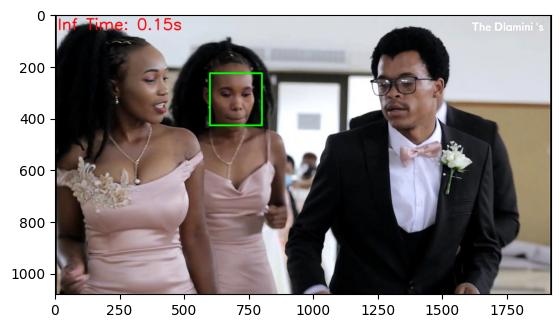

In [9]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Dlib-HOG

A widely used Face Detector, Dlib uses the classical Histogram of Gradients (HoG) feature, combined with a linear classifier, an image pyramid and a sliding window detection scheme. Learn more about HoG in this post. It employs 5 HOG filters:

1. front looking 
2. left looking 
3. right looking 
4. front looking, but rotated left 
5. front looking, but rotated right 

### Import Dependencies

In [10]:
import cv2
import dlib
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Initializing the Dlib Face Detector



In [11]:
# Initializing the Dlib Face Detector
detector = dlib.get_frontal_face_detector()

### Inference

In [12]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = detector(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

Detections: rectangles[[(612, 254) (791, 433)], [(1197, 194) (1455, 452)], [(305, 185) (520, 400)]]
Inference time: 0.185s


### Display Detections

In [13]:
# Draw detections
if len(detections) > 0:
    for detection in detections:
        # Converting predicted and ground truth bounding boxes to required format
        pred_bbox = [detection.left(),detection.top(),detection.right()-detection.left(),detection.bottom()-detection.top()]
        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

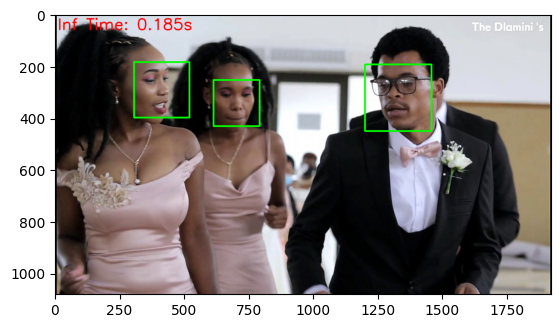

In [14]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## SSD

Single Shot detector the name of the model itself reveals most of the details about the model. Yes, the SSD model detects the object in a single pass over the input image, unlike other models, which traverse the image more than once to get an output detection.

### Import Dependencies

In [15]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Initializing the SSD Face Detector



In [16]:
!wget "https://github.com/spmallick/learnopencv/blob/master/FaceDetectionComparison/models/res10_300x300_ssd_iter_140000_fp16.caffemodel?raw=true" -O res10_300x300_ssd_iter_140000_fp16.caffemodel
!wget "https://raw.githubusercontent.com/spmallick/learnopencv/master/FaceDetectionComparison/models/deploy.prototxt" -O deploy.prototxt

--2022-12-26 11:44:23--  https://github.com/spmallick/learnopencv/blob/master/FaceDetectionComparison/models/res10_300x300_ssd_iter_140000_fp16.caffemodel?raw=true
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/spmallick/learnopencv/raw/master/FaceDetectionComparison/models/res10_300x300_ssd_iter_140000_fp16.caffemodel [following]
--2022-12-26 11:44:24--  https://github.com/spmallick/learnopencv/raw/master/FaceDetectionComparison/models/res10_300x300_ssd_iter_140000_fp16.caffemodel
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/spmallick/learnopencv/master/FaceDetectionComparison/models/res10_300x300_ssd_iter_140000_fp16.caffemodel [following]
--2022-12-26 11:44:24--  https://raw.githubusercontent.com/spmallick/learnopencv/master/FaceDetectionC

In [17]:
detector = cv2.dnn.DetectionModel("res10_300x300_ssd_iter_140000_fp16.caffemodel", "deploy.prototxt")

### Inference

In [18]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = detector.detect(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

Detections: (array([1, 1, 1], dtype=int32), array([0.99657226, 0.98955965, 0.95180017], dtype=float32), array([[1240,  141,  222,  294],
       [ 258,  126,  209,  289],
       [ 607,  225,  163,  204]], dtype=int32))
Inference time: 0.017s


### Display Detections

In [19]:
# Draw detections
if len(detections[2]) > 0:
    for face in detections[2]:
        cv2.rectangle(img,face,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

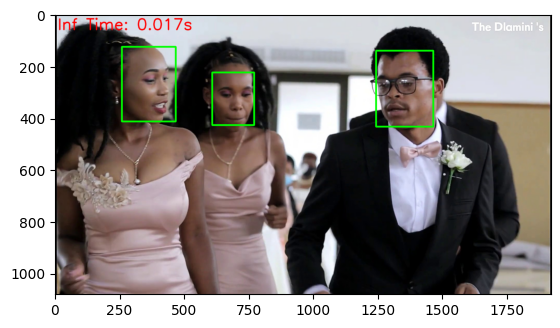

In [20]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## MTCNN

A more recent model, MTCNN stands for Multi-Task Cascaded Convolutional Neural Network. Published in 2016 by Zhang et al., this commonly used model consists of neural networks connected in a cascade fashion. 

### Import Dependencies

In [21]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Initializing the MTCNN Face Detector



In [22]:
!pip install mtcnn

In [23]:
from mtcnn.mtcnn import MTCNN

2022-12-26 11:44:32.615587: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-26 11:44:32.973860: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tjamil/anaconda3/envs/cv/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-26 11:44:32.973883: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-26 11:44:33.772532: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so

In [24]:
detector=MTCNN()

2022-12-26 11:44:34.888822: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-26 11:44:34.889073: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tjamil/anaconda3/envs/cv/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-26 11:44:34.889143: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tjamil/anaconda3/envs/cv/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-26 11:44:34.889182: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader

### Inference

In [25]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = detector.detect_faces(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

1/1 [==============================] - 0s 88ms/step
Detections: [{'box': [596, 211, 165, 228], 'confidence': 0.9996464252471924, 'keypoints': {'left_eye': (662, 310), 'right_eye': (738, 312), 'nose': (710, 356), 'mouth_left': (668, 397), 'mouth_right': (725, 399)}}, {'box': [266, 113, 208, 291], 'confidence': 0.9986671209335327, 'keypoints': {'left_eye': (371, 236), 'right_eye': (450, 234), 'nose': (436, 296), 'mouth_left': (367, 341), 'mouth_right': (433, 339)}}, {'box': [1237, 167, 208, 265], 'confidence': 0.9793738126754761, 'keypoints': {'left_eye': (1274, 275), 'right_eye': (1361, 263), 'nose': (1301, 314), 'mouth_left': (1287, 378), 'mouth_right': (1354, 373)}}]
Inference time: 1.219s


### Display Detections

In [26]:
# Draw detections
if len(detections) > 0:
    for detection in detections:
        # Converting predicted and ground truth bounding boxes to required format
        pred_bbox = detection['box']
        # print("bbox:", pred_bbox)
        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

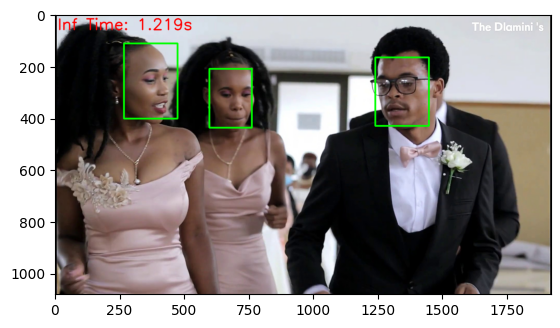

In [27]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## DSFD

Dual Shot Face Detector is a novel Face Detection approach that addresses the following three major aspects of Face Detection:

1. Better feature learning
2. Progressive loss design
3. Anchor assign-based data augmentation

### Import Dependencies

In [28]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Installing DSFD Pytorch

In [29]:
#!pip install git+https://github.com/hukkelas/DSFD-Pytorch-Inference.git
!pip install face_detection

  Cloning https://github.com/hukkelas/DSFD-Pytorch-Inference.git to /tmp/pip-req-build-4rmvuuwf
  Running command git clone --filter=blob:none --quiet https://github.com/hukkelas/DSFD-Pytorch-Inference.git /tmp/pip-req-build-4rmvuuwf
  Resolved https://github.com/hukkelas/DSFD-Pytorch-Inference.git to commit fc1051d80936e3d7a6e34053bb5485c0a032e42e
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-req-build-4rmvuuwf/setup.py", line 2, in <module>
          import torch
      ModuleNotFoundError: No module named 'torch'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while g

### Initializing the DSFD Face Detector



In [30]:
import face_detection

ModuleNotFoundError: No module named 'face_detection'

In [ ]:
detector = face_detection.build_detector("DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3)

### Inference

In [ ]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = detector.detect(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

### Display Detections

In [ ]:
# Draw detections
if len(detections) > 0:
    for detection in detections:
        # Converting predicted and ground truth bounding boxes to required format
        pred_bbox = detection

        pred_bbox[2] = pred_bbox[2] - pred_bbox[0]
        pred_bbox[3] = pred_bbox[3] - pred_bbox[1]

        pred_bbox = [int(i) for i in pred_bbox[:4]]

        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

In [ ]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## RetinaFace-MobileNetV1

RetinaFace is a practical single-stage SOTA face detector that was initially introduced in the arXiv technical report and then accepted by CVPR 2020. It is a part of the InsightFace project from DeepInsight, which is also credited with many more top Face-Recognition techniques like ArcFace, SubCenter ArcFace, PartialFC, and multiple facial applications too.

### Import Dependencies

In [ ]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Installing DSFD Pytorch

In [ ]:
!pip install git+https://github.com/hukkelas/DSFD-Pytorch-Inference.git

### Initializing the RetinaNetMobileNetV1 Face Detector



In [ ]:
import face_detection

In [ ]:
detector = face_detection.build_detector("RetinaNetMobileNetV1", confidence_threshold=.5, nms_iou_threshold=.3)

### Inference

In [ ]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = detector.detect(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

### Display Detections

In [ ]:
# Draw detections
if len(detections) > 0:
    for detection in detections:
        # Converting predicted and ground truth bounding boxes to required format
        pred_bbox = detection

        pred_bbox[2] = pred_bbox[2] - pred_bbox[0]
        pred_bbox[3] = pred_bbox[3] - pred_bbox[1]

        pred_bbox = [int(i) for i in pred_bbox[:4]]

        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

In [ ]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## RetinaFace-ResNet50

RetinaFace is a practical single-stage SOTA face detector that was initially introduced in the arXiv technical report and then accepted by CVPR 2020. It is a part of the InsightFace project from DeepInsight, which is also credited with many more top Face-Recognition techniques like ArcFace, SubCenter ArcFace, PartialFC, and multiple facial applications too.

### Import Dependencies

In [ ]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Installing DSFD Pytorch

In [ ]:
!pip install git+https://github.com/hukkelas/DSFD-Pytorch-Inference.git

### Initializing the RetinaNetResNet50 Face Detector



In [ ]:
import face_detection

In [ ]:
detector = face_detection.build_detector("RetinaNetResNet50", confidence_threshold=.5, nms_iou_threshold=.3)

### Inference

In [ ]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = detector.detect(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

### Display Detections

In [ ]:
# Draw detections
if len(detections) > 0:
    for detection in detections:
        # Converting predicted and ground truth bounding boxes to required format
        pred_bbox = detection

        pred_bbox[2] = pred_bbox[2] - pred_bbox[0]
        pred_bbox[3] = pred_bbox[3] - pred_bbox[1]

        pred_bbox = [int(i) for i in pred_bbox[:4]]

        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

In [ ]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## MediaPipe

A framework for building perception pipelines that perform inferences over arbitrary sensory data, MediaPipe includes images, video streams, as well as audio data. 

It can be used for rapid prototyping of perception pipelines with reusable components and in production-ready Machine Learning applications. 

### Import Dependencies

In [ ]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Initializing the MediaPipe Face Detector



In [ ]:
!pip install mediapipe

In [ ]:
import mediapipe as mp

In [ ]:
mp_face_detection = mp.solutions.face_detection

detector = mp_face_detection.FaceDetection(min_detection_confidence=0.4)

### Inference

In [ ]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
predictions = detector.process(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {predictions.detections}")
print(f"Inference time: {inf_time}s")

### Display Detections

In [ ]:
# Draw detections
if predictions.detections:
    for detection in predictions.detections:
        # Converting predicted and ground truth bounding boxes to required format
        img_W = int(img.shape[1])
        img_H = int(img.shape[0])
        pred_bbox = detection.location_data.relative_bounding_box
        pred_bbox = [int(pred_bbox.xmin * img_W), int(pred_bbox.ymin * img_H), int(pred_bbox.width * img_W), int(pred_bbox.height * img_H)]
        print("bbox:", pred_bbox)
        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

In [ ]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## YuNet

Traditionally OpenCV was equipped with the face detectors like Haar cascades and HOG detectors that worked well for frontal faces but failed otherwise. The recent release of OpenCV (4.5.4 Oct 2021) saw the addition of a face detection model called YuNet that solves this problem. 

It is a CNN-based face detector developed by Chengrui Wang and Yuantao Feng. It is a very lightweight and fast model. With a model size of less than an MB, it can be loaded on almost any device. It adopts mobilenet as its backbone and contains 85000 parameters in total. 

### Import Dependencies

In [ ]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Initializing the YuNet Face Detector



In [ ]:
!wget "https://github.com/opencv/opencv_zoo/blob/master/models/face_detection_yunet/face_detection_yunet_2022mar.onnx?raw=true" -O face_detection_yunet_2022mar.onnx

In [ ]:
detector = cv2.FaceDetectorYN.create("face_detection_yunet_2022mar.onnx", "", (320, 320))

### Inference

In [ ]:
# Read image
img = cv2.imread(image_path)

# Get image dimensions
img_W = int(img.shape[1])
img_H = int(img.shape[0])

# Save time
t0 = time.time()

# Getting the detections
detector.setInputSize((img_W, img_H))
detections = detector.detect(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

### Display Detections

In [ ]:
# Draw detections
if (detections[1] is not None) and (len(detections[1]) > 0):
    for detection in detections[1]:
        # Converting predicted and ground truth bounding boxes to required format
        pred_bbox = detection
        pred_bbox = [int(i) for i in pred_bbox[:4]]

        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

In [ ]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()